1 加载数据

In [1]:
import pandas as pd

In [2]:
# 加载数据
data = pd.read_csv("Telco-Customer-Churn.csv")
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,no,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,no,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,no,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,no,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,no,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
''' 
gender = 性别
senior citizen = 老年人
partner = 是否有配偶
dependents = 是否有依赖
tenure = 客户在公司的时间
phone service = 是否开通电话服务
multiple lines = 是否开通多条线路
internet service = 是否开通互联网服务
online security = 是否开通在线安全服务
online backup = 是否开通在线备份服务
device protection = 是否开通设备保护服务
tech support = 是否开通技术支持服务
streaming tv = 是否开通电视流服务
streaming movies = 是否开通电影流服务
contract = 合同类型
paperless billing = 是否开通无纸化账单服务
payment method = 支付方式
monthly charges = 月费用
total charges = 总费用

churn = 是否流失 yes=流失 no=不流失
'''

' \ngender = 性别\nsenior citizen = 老年人\npartner = 是否有配偶\ndependents = 是否有依赖\ntenure = 客户在公司的时间\nphone service = 是否开通电话服务\nmultiple lines = 是否开通多条线路\ninternet service = 是否开通互联网服务\nonline security = 是否开通在线安全服务\nonline backup = 是否开通在线备份服务\ndevice protection = 是否开通设备保护服务\ntech support = 是否开通技术支持服务\nstreaming tv = 是否开通电视流服务\nstreaming movies = 是否开通电影流服务\ncontract = 合同类型\npaperless billing = 是否开通无纸化账单服务\npayment method = 支付方式\nmonthly charges = 月费用\ntotal charges = 总费用\n\nchurn = 是否流失 yes=流失 no=不流失\n'

2 清洗数据

In [4]:
# 数据描述
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [5]:
# 数据行列
data.shape

(7032, 20)

In [6]:
# 每一列数据类型
data.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [7]:
# 查看缺失值
data.isnull().sum() # 统计每列有多少缺失值

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
# 查看预测结果的分布
data['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

3 切分 x y

In [9]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(data['Churn'].values)
''' 
fit_transform 将数据转换成单列的 数字标签
'''
y

array([0, 0, 1, ..., 0, 1, 0])

In [10]:
x = pd.get_dummies(data.iloc[:, 0:19],drop_first=True,dtype = int)
''' 
get_dummies 独热编码 将分类变量转换为 bool 或 int
get_dummies 的输出为多列0/1的组合

dtype = int 将分类变量转换为 int 第一个=00 第二个= 01
dtype = bool 将分类变量转换为 bool

drop_first=True
原始->  B  C
A      0  0
B      1  0
C      0  1

drop_first=false
原始->  A  B  C
A      1  0  0
B      0  1  0
C      0  0  1
'''
x.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [11]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(
    x, # 特征数据集
    y, # 标签数据集
    test_size=0.2, # 随机0.2作为测试
    random_state=0 # 随机拆分种子
)

4 训练模型

In [12]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state = 0)

In [13]:
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [14]:
# 查看每个维度的重要程度
importance = pd.DataFrame(model.feature_importances_, index = x.columns, columns = ["Importance"]).sort_values(by= "Importance", ascending= False)
importance

,Importance
tenure,0.202008
MonthlyCharges,0.198780
TotalCharges,0.197211
InternetService_Fiber optic,0.106219
PaymentMethod_Electronic check,0.027753
gender_Male,0.025480
SeniorCitizen_yes,0.021220
MultipleLines_Yes,0.020589
PaperlessBilling_Yes,0.020415
Dependents_Yes,0.019740


5 评估

In [15]:
# 准确率 方法1
print(model.score(x_train,y_train)) # 训练集准确率
print(model.score(x_test,y_test)) # 测试集准确率

0.9978666666666667
0.7334754797441365


In [16]:
# 准确率 方法2 
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score

print(accuracy_score(y_train,y_train_pred)) # 训练集准确率
print(accuracy_score(y_test,y_test_pred)) # 测试集准确率

0.9978666666666667
0.7334754797441365


6 解决过拟合

In [17]:
# 混淆矩阵
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_test_pred)
''' 

'''
print(cm)

[[846 192]
 [183 186]]


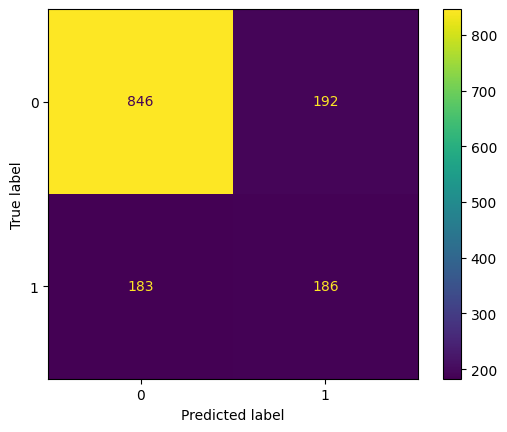

In [18]:
# 可视化混淆矩阵
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

In [19]:
''' 
过拟合原因 = 决策路径分的太细了

'''

' \n过拟合原因 = 决策路径分的太细了\n\n'

In [20]:
# 加入约束再次训练
''' 
max_depth 最大深度
'''
model2 = DecisionTreeClassifier(max_depth=4, random_state=0)
model2.fit(x_train, y_train)

# 准确率 
print(model2.score(x_train,y_train)) # 训练集准确率
print(model2.score(x_test,y_test)) # 测试集准确率


0.7905777777777778
0.7853589196872779


7 可视化

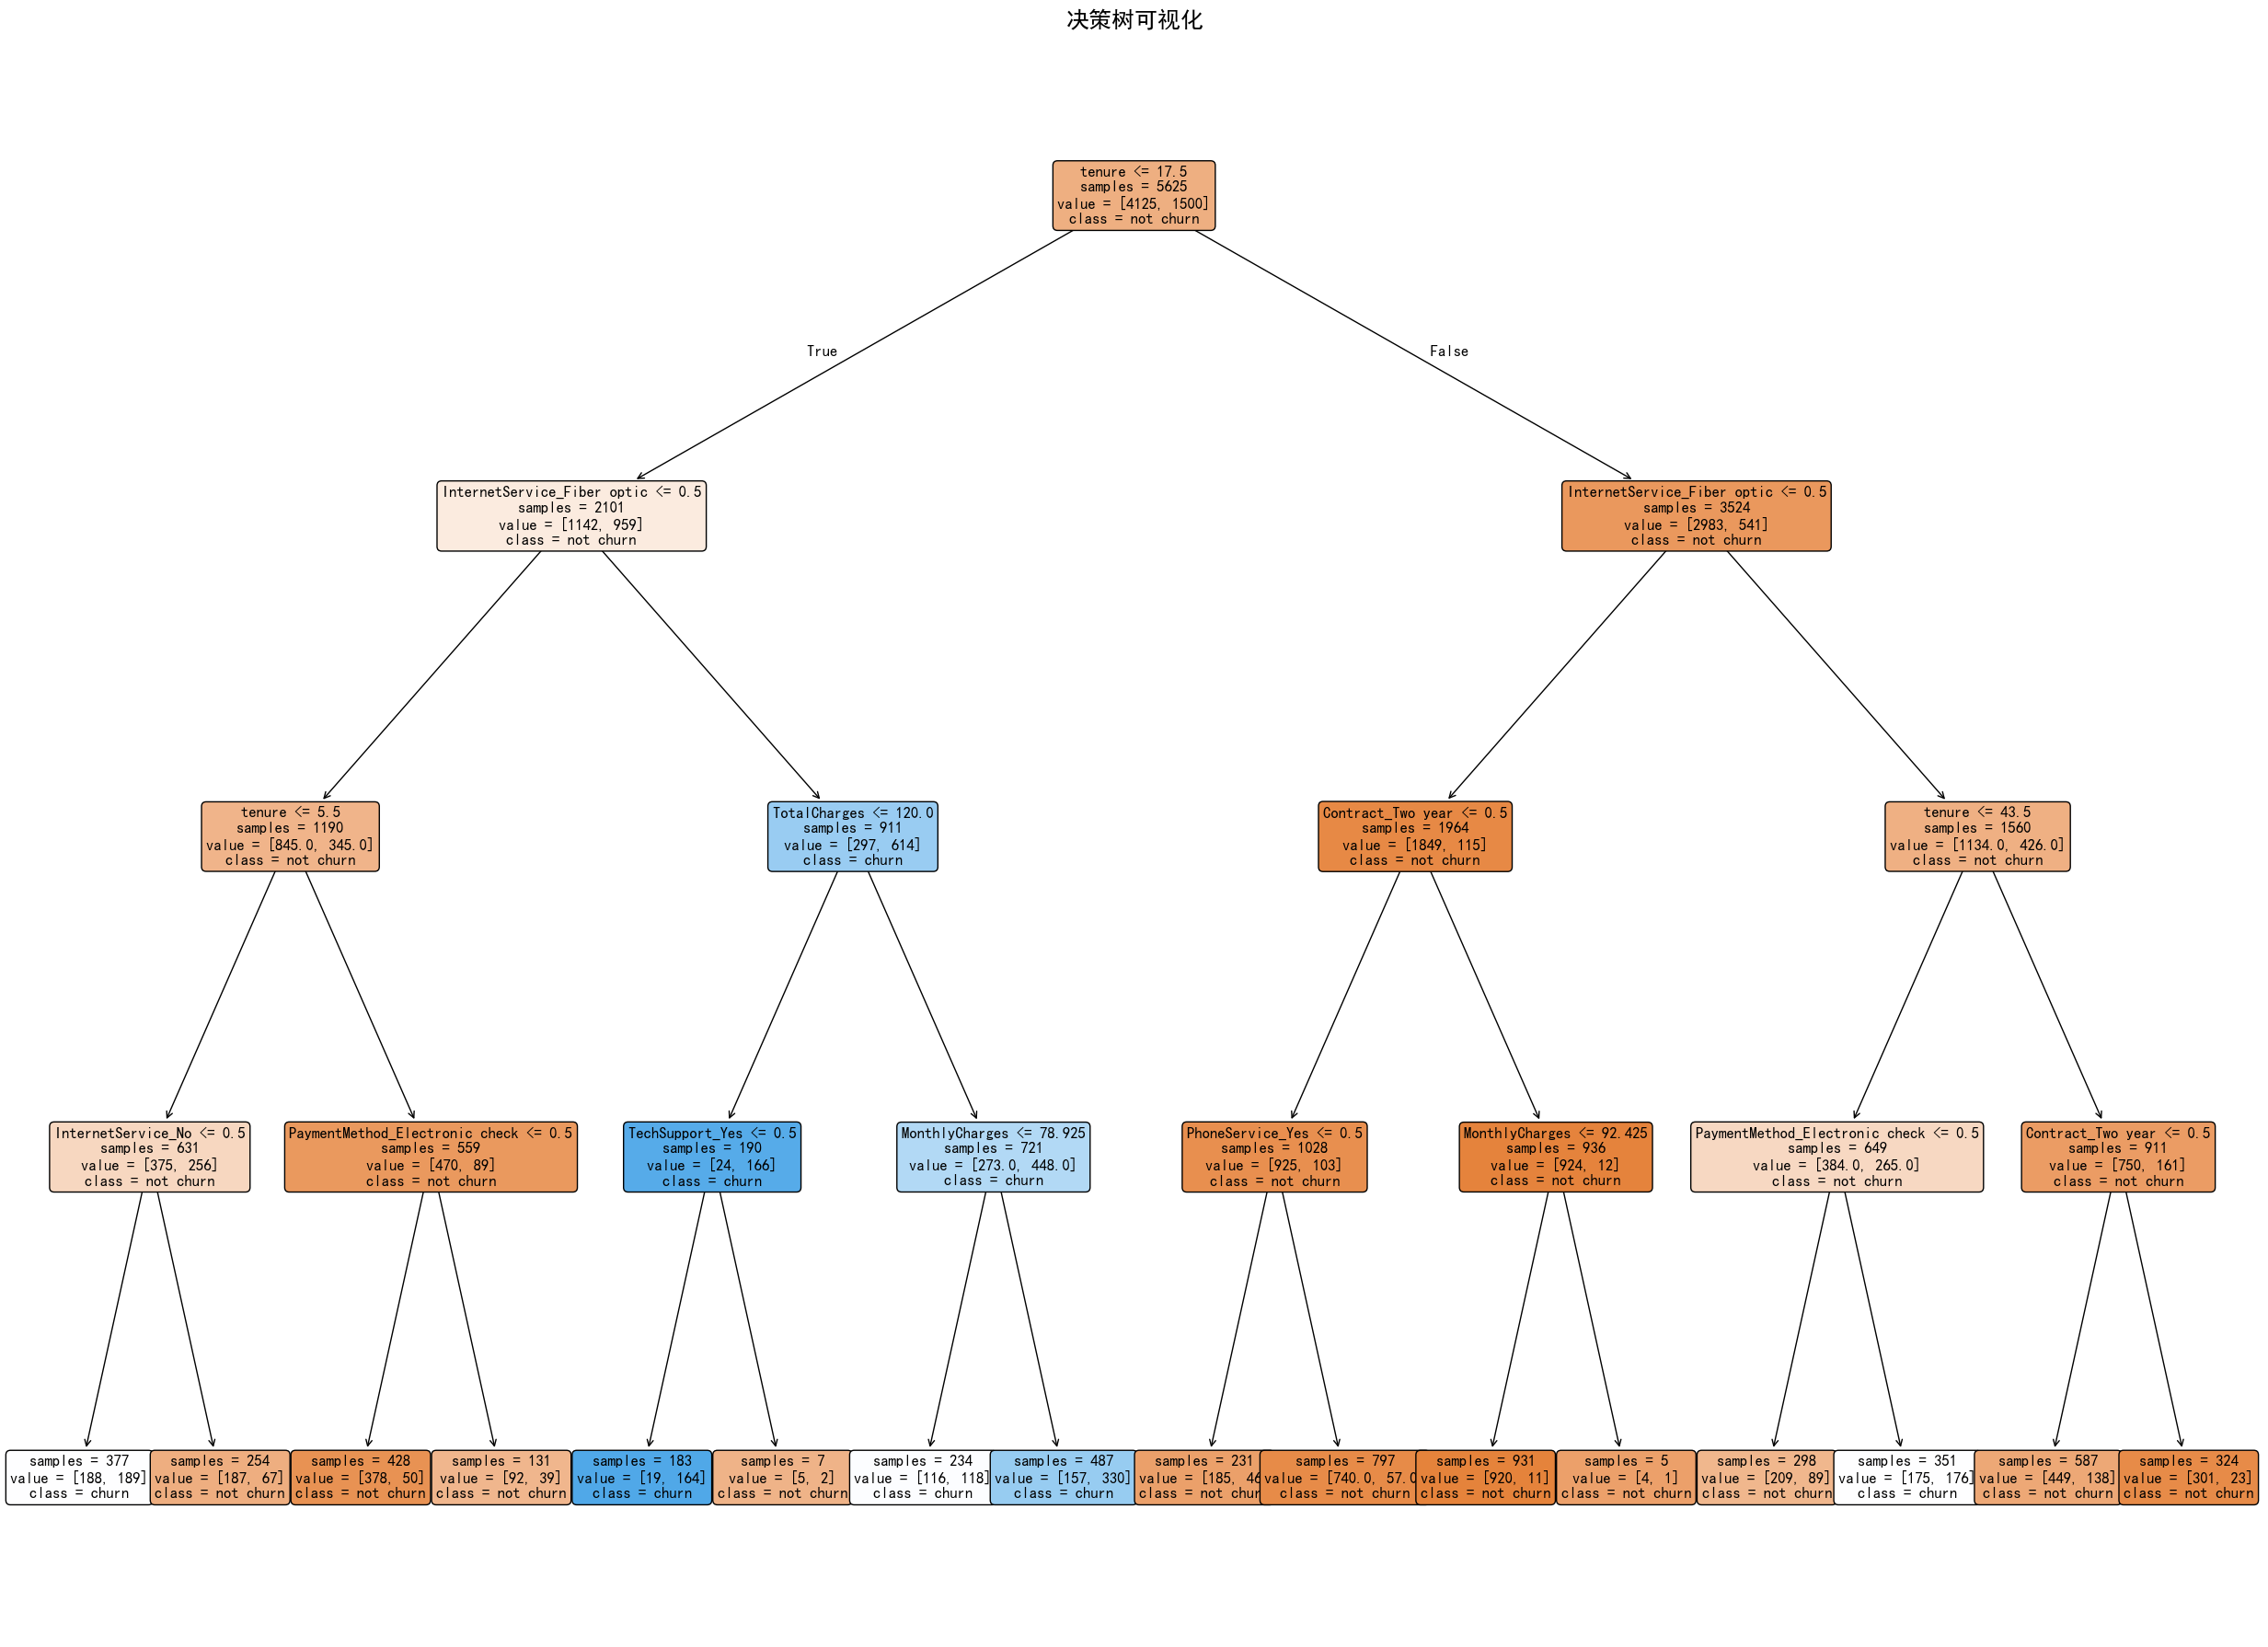

In [21]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
# 设置中文字体显示
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(25, 18))  # 减小图形尺寸，让框相对更大
plot_tree(model2, 
          feature_names=x_train.columns,
          class_names=["not churn", "churn"],
          filled=True,
          rounded=True,
          fontsize=12,  # 增大字体
          proportion=False,  # 不按比例显示，框大小一致
          impurity=False)   
plt.title("决策树可视化", fontsize=18)
plt.tight_layout()  # 使用tight_layout自动紧凑布局
plt.show()

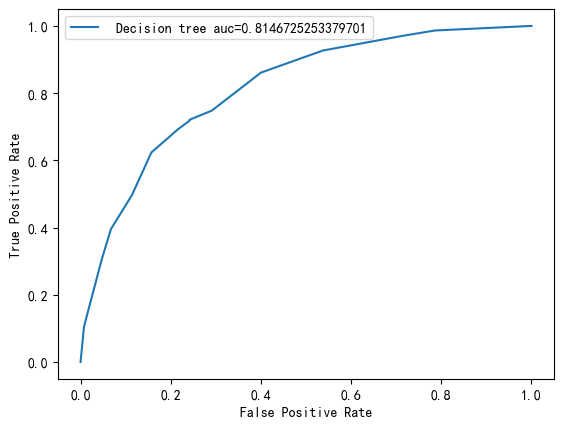

In [22]:
# model2的 图
# roc曲线 和 auc值

# 概率预测而不是分类预测，分类预测会导致roc曲线为折线图
y2_train_pred = model2.predict_proba(x_train)[:,1]
y2_test_pred = model2.predict_proba(x_test)[:,1]

import matplotlib.pyplot as plt
from sklearn import metrics
from matplotlib import pyplot
fpr, tpr, _ = metrics.roc_curve(y_test, y2_test_pred)
auc = metrics.roc_auc_score(y_test, y2_test_pred) # auc值
pyplot.plot(fpr,tpr,label=" Decision tree auc="+str(auc))
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()
plt.show()